# Project:-Based on the features predict medical cost for a patient

 age: age of primary beneficiary
 
sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Missing Values

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Exploratory 

#### Each feature indivudually

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Bmi VS Charges

<AxesSubplot:xlabel='bmi'>

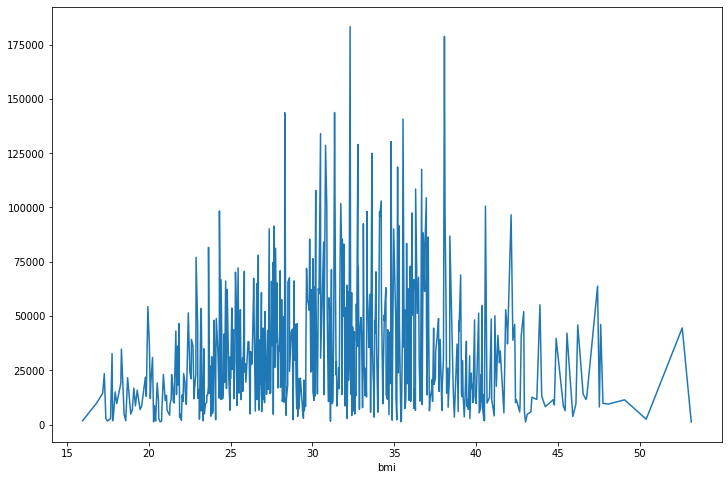

In [25]:
plt.figure(figsize=(12,8))
df.groupby('bmi').sum().sort_values('bmi')['charges'].plot()

In [79]:
bmi=df.groupby('bmi').sum()['charges'].reset_index().sort_values('bmi')
bmi.head(10)

,bmi,charges
0,15.960,1694.79640
1,16.815,9808.00070
2,17.195,14455.64405
3,17.290,23440.06030
4,17.385,2775.19215
5,17.400,2585.26900
6,17.480,1621.34020
7,17.670,2680.94930
8,17.765,32734.18630
9,17.800,1727.78500


Text(0.5, 1.0, 'Bmi Vs Medical Charges')

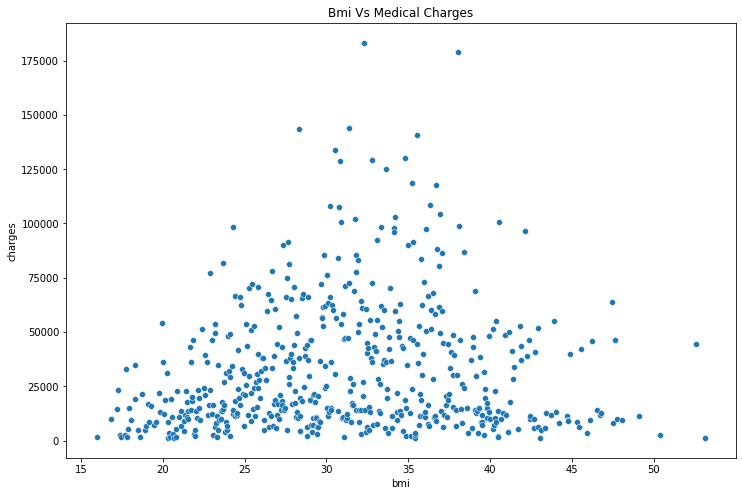

In [82]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='bmi',y='charges',data=bmi)
plt.title('Bmi Vs Medical Charges')

#### Bmi vs charges according to sex

<AxesSubplot:xlabel='bmi', ylabel='charges'>

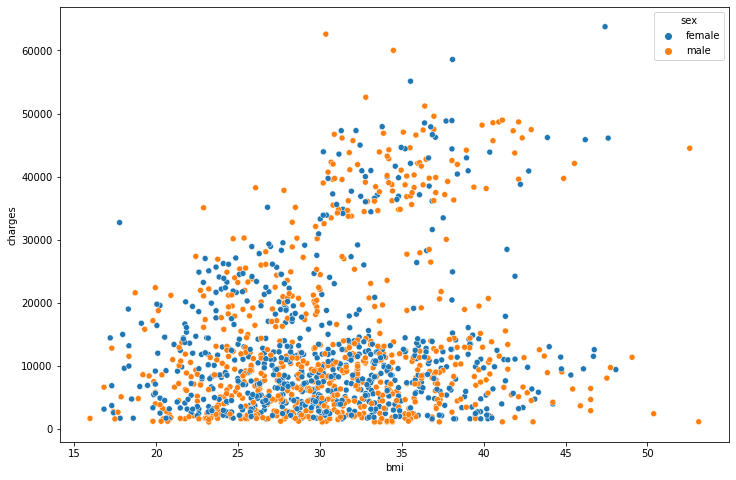

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='bmi',y='charges',data=df,hue='sex')

In [37]:
df['charges'].sort_values(ascending=False)

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
           ...     
22       1137.01100
663      1136.39940
1244     1135.94070
808      1131.50660
940      1121.87390
Name: charges, Length: 1338, dtype: float64

In [41]:
#df['charges'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
#sns.countplot(x='charges',data=df)

#### Age vs charges

In [69]:
ages=df.groupby('age').sum()['charges'].reset_index().sort_values('age')
ages.head(10)

,age,charges
0,18,488949.011389
1,19,662857.834750
2,20,294631.234350
3,21,132453.001230
4,22,280362.118450
5,23,347754.961110
6,24,298144.446940
7,25,275474.228700
8,26,171747.108640
9,27,341171.648200


Text(0.5, 1.0, 'Age vs Charges')

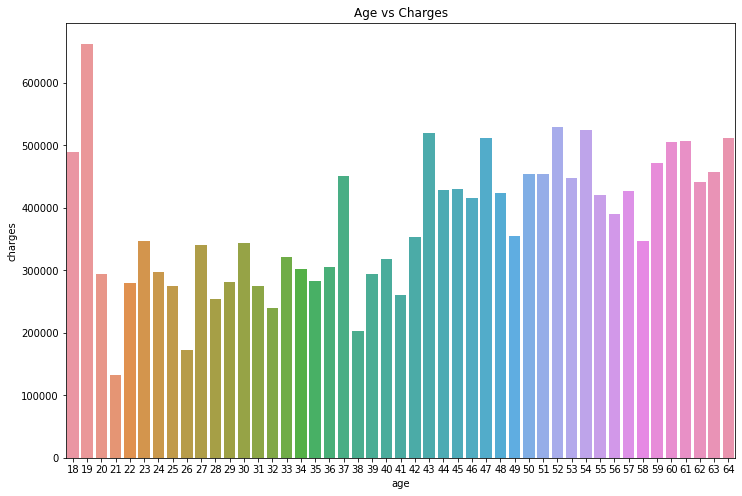

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x='age',y='charges',data=ages)
plt.title('Age vs Charges')

#### Children vs medical charges

In [93]:
child=df.groupby('children').sum()['charges'].reset_index().sort_values('children',ascending=False)
child.head(10)

,children,charges
5,5,1.581486e+05
4,4,3.462664e+05
3,3,2.410785e+06
2,2,3.617655e+06
1,1,4.124900e+06
0,0,7.098070e+06


Text(0.5, 1.0, 'Children vs Medical charges')

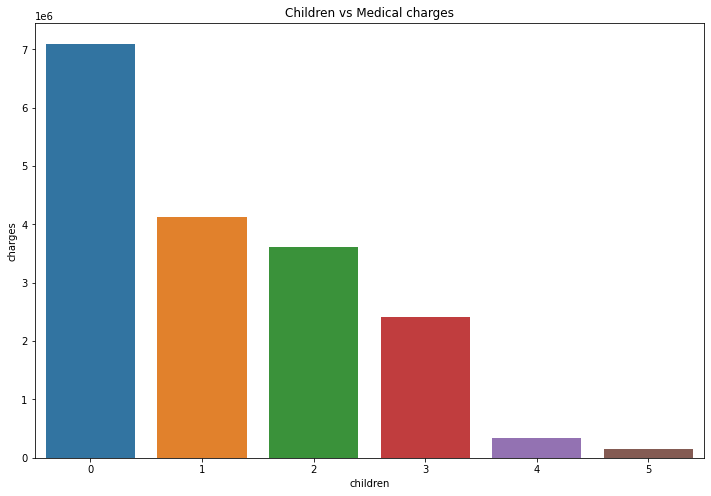

In [94]:
plt.figure(figsize=(12,8))
sns.barplot(x='children',y='charges',data=child)
plt.title('Children vs Medical charges')

#### correlation plot 

In [95]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

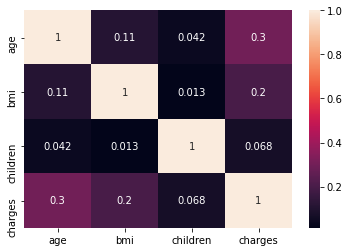

In [96]:
sns.heatmap(df.corr(),annot=True)

In [105]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

<AxesSubplot:>

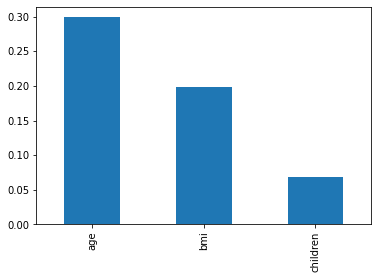

In [108]:
df.corr()['charges'].sort_values(ascending=False).drop('charges').plot(kind='bar')

#### Feature Engineering 

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [118]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [130]:
def sex(sex):
    if sex=='male':
        return 1
    else:
        return 0
    

In [131]:
df['sex']=df['sex'].apply(sex)

In [133]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [134]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [135]:
def smoker(smoker):
    if smoker=='yes':
        return 1
    else:
        return 0

In [139]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [140]:
def region(region):
    if region=='sountwest':
        return 1
    elif region=='southeast':
        return 2
    elif region =='northwest':
        return 3
    else:
        return 4
    

In [141]:
df['smoker']=df['smoker'].apply(smoker)
df['region']=df['region'].apply(region)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


#### Traing and Testing Data

In [144]:
X=df.drop(['charges'],axis=1)

In [145]:
y=df['charges']

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
predictions=lr.predict(X_test)

#### model evaluation

In [152]:
lr.score(X_test,y_test)

0.7683652667543048